<a href="https://colab.research.google.com/github/cmason30/datascience-funhouse/blob/master/pytorch2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torchvision import models

In [ ]:
dir(models)

In [ ]:
alexnet = models.AlexNet()

In [ ]:
resnet = models.resnet101(pretrained=True)

In [ ]:
resnet
# Running this shows the modules (one each line) each one is an individual operation,
# like building blocks of a neural network

In [ ]:
from torchvision import transforms 
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[.485, .456, .406],
                                     std=[.229, .224, .225]
                                 )])

# Defined aa preprocess function that will scale an input image to 256x256
# Then crop image to 224x224 around the center
# Then transform it to a tensor (PyTor ch multi-dimensional array)
# In this case a 3D array with color, height, and width
# And normalize its RGB components so they have defined means and st dev


In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving bobby.jpeg to bobby.jpeg


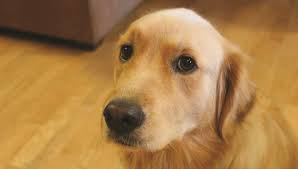

In [ ]:
from PIL import Image
img = Image.open("bobby.jpeg")
img

In [ ]:
img_t = preprocess(img)

# Pass image through preprocessing pipeline

In [ ]:
import torch 
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
resnet.eval()

# Evaluation is important because with some pretrained models
# they may not produce meaningful answers without eval


In [ ]:
out = resnet(batch_t)
out

# Vector of 1000 scores. We need to find the label of the class with the highest score.
# This would tell us what the model saw in the image
